Part 1: Test of Significance
Problem 1
A company wants to test if the average assembly time has decreased after training.
Here’s how you can approach it:

State the Hypotheses:

Null Hypothesis (H0): The average assembly time is still 35 minutes.
Alternative Hypothesis (H1): The average assembly time is less than 35 minutes (one-tailed test).
Determine the Test Statistic:

We use a Z-test since the population standard deviation is known.
Given data:
Population mean (
𝜇
0
μ 
0
​
 ) = 35 minutes
Sample mean (
𝑥
ˉ
x
ˉ
 ) = 33 minutes
Population standard deviation (
𝜎
σ) = 5 minutes
Sample size (n) = 40

In [1]:
from scipy.stats import norm, t
from scipy.optimize import linprog
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Test of Significance Updates

# Problem 1 - Assembly Time Hypothesis Test (Z-test)
population_mean = 35  # mean assembly time before training
sample_mean = 33  # mean assembly time after training
population_std = 5  # known population standard deviation
sample_size = 40  # number of employees sampled
alpha = 0.05  # significance level

# Calculate Z-test statistic and critical Z value
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value = norm.cdf(z_score)
z_critical = norm.ppf(alpha)  # For a one-tailed test

# Display Z-test results with critical value
print("\nTest for Decrease in Assembly Time after Training")
print("------------------------------------------------")
print(f"Null Hypothesis (H0): Average assembly time is 35 minutes.")
print(f"Alternative Hypothesis (H1): Average assembly time is less than 35 minutes.")
print(f"Z-score: {z_score:.2f}")
print(f"Critical Z-score at {alpha*100}% significance level: {z_critical:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance Level: {alpha}")

time_reduction = population_mean - sample_mean

if p_value < alpha:
    print("\nConclusion: Since the p-value (", round(p_value, 4), ") is less than the significance level (", alpha, "), we reject the null hypothesis.")
    print(f"There is sufficient evidence to conclude that the training program has significantly reduced the assembly time by {time_reduction} minutes.")
else:
    print("\nConclusion: Since the p-value (", round(p_value, 4), ") is greater than the significance level (", alpha, "), we fail to reject the null hypothesis.")
    print(f"There is not enough evidence to conclude that the training program has reduced the assembly time by {time_reduction} minutes.")
    print(f"The calculated z-score of {z_score:.2f} does not exceed the critical z-score ({z_critical:.2f}) required at the {alpha*100}% significance level.")



Test for Decrease in Assembly Time after Training
------------------------------------------------
Null Hypothesis (H0): Average assembly time is 35 minutes.
Alternative Hypothesis (H1): Average assembly time is less than 35 minutes.
Z-score: -2.53
Critical Z-score at 5.0% significance level: -1.64
P-value: 0.0057
Significance Level: 0.05

Conclusion: Since the p-value ( 0.0057 ) is less than the significance level ( 0.05 ), we reject the null hypothesis.
There is sufficient evidence to conclude that the training program has significantly reduced the assembly time by 2 minutes.


2. Test of Significance - Graduate Students Study Time Hypothesis Test


Regression Analysis for Study Hours vs. Exam Score
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.173e+33
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:45:27   Log-Likelihood:                 981.93
No. Observations:                  30   AIC:                            -1960.
Df Residuals:                      28   BIC:                            -1957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

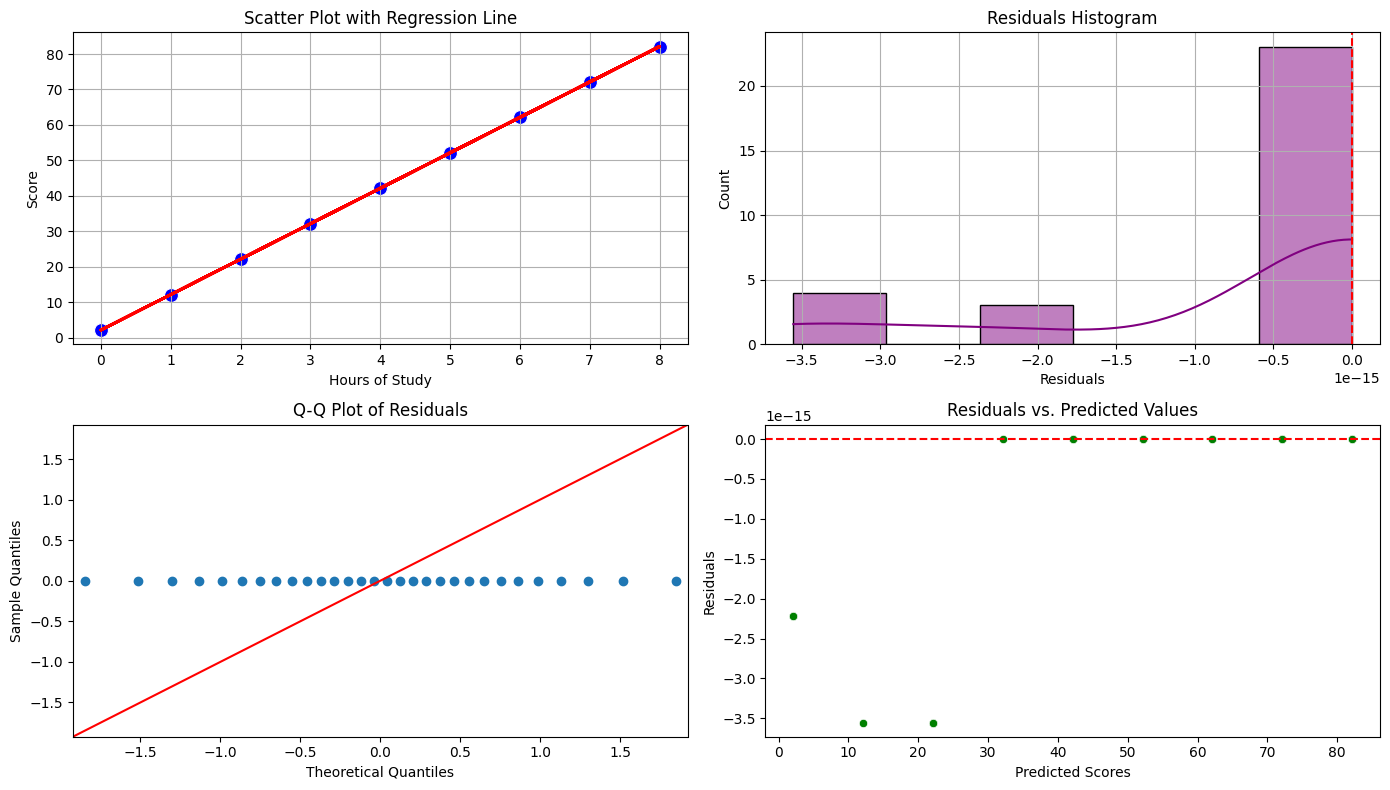

In [3]:
# Sample data for regression
data = {
    'Hours_of_Study': [5, 8, 5, 7, 7, 8, 3, 8, 0, 8, 5, 0, 2, 8, 7, 7, 4, 4, 2, 6, 1, 7, 6, 2, 8, 0, 5, 8, 7, 4],
    'Score': [52.1221, 82.1221, 52.1221, 72.1221, 72.1221, 82.1221, 32.1221, 82.1221, 2.1221, 82.1221,
              52.1221, 2.1221, 22.1221, 82.1221, 72.1221, 72.1221, 42.1221, 42.1221, 22.1221, 62.1221,
              12.1221, 72.1221, 62.1221, 22.1221, 82.1221, 2.1221, 52.1221, 82.1221, 72.1221, 42.1221]
}
df = pd.DataFrame(data)

# Fit the regression model
X = sm.add_constant(df['Hours_of_Study'])
Y = df['Score']
model = sm.OLS(Y, X).fit()

# Display summary
print("\nRegression Analysis for Study Hours vs. Exam Score")
print(model.summary())

# Visualizations for diagnostics
plt.figure(figsize=(14, 8))

# Scatter plot with regression line
plt.subplot(2, 2, 1)
sns.scatterplot(x='Hours_of_Study', y='Score', data=df, s=100, color="blue")
plt.plot(df['Hours_of_Study'], model.predict(X), color="red", linewidth=2)
plt.xlabel("Hours of Study")
plt.ylabel("Score")
plt.title("Scatter Plot with Regression Line")
plt.grid(True)

# Residuals histogram
plt.subplot(2, 2, 2)
sns.histplot(model.resid, kde=True, color="purple")
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.axvline(x=0, color="red", linestyle="--")
plt.grid(True)

# Q-Q plot for residuals
plt.subplot(2, 2, 3)
sm.qqplot(model.resid, line='45', ax=plt.gca())
plt.title("Q-Q Plot of Residuals")

# Residuals vs. Predicted Values
plt.subplot(2, 2, 4)
sns.scatterplot(x=model.predict(X), y=model.resid, color="green")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Scores")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")

plt.tight_layout()
plt.show()



3 .Regression Analysis - Hours of Study vs. Exam Score

In [4]:
# Part 3: Linear Optimization
# Define objective function and constraints
c = [-1, -1, -1]  # Maximize x + y + z, hence -1 for minimization in linprog
A = [[2, 1, 3], [4, 3, 2]]  # Coefficients for Machine X and Y constraints
b = [100, 85]  # Availability of Machine X and Y hours
x_bounds = (0, None)
y_bounds = (0, None)
z_bounds = (0, None)

# Solving the linear optimization problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds, z_bounds], method='highs')

print("\nLinear Optimization for Production")
print("------------------------------------------------")
if result.success:
    print("Optimal production levels found:")
    print(f"Product A units: {result.x[0]:.2f}")
    print(f"Product B units: {result.x[1]:.2f}")
    print(f"Product C units: {result.x[2]:.2f}")
    print(f"Total production achieved: {-result.fun:.2f} units")
    
    # Analyze which machine constraint is limiting
    if (A[0][0] * result.x[0] + A[0][1] * result.x[1] + A[0][2] * result.x[2]) >= b[0]:
        limiting_machine = "Machine X"
    else:
        limiting_machine = "Machine Y"
    print(f"Limiting factor: {limiting_machine}.")
else:
    print("Optimization did not succeed. Please check constraints or parameters.")


Linear Optimization for Production
------------------------------------------------
Optimal production levels found:
Product A units: 0.00
Product B units: 7.86
Product C units: 30.71
Total production achieved: 38.57 units
Limiting factor: Machine X.
